In [34]:
import xarray as xr
import os
import netCDF4
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from rasterio import features
from affine import Affine


ModuleNotFoundError: No module named 'rasterio'

In [33]:
path ='../data/cmip6/'
test_df=xr.open_dataset(path + 'tx90pETCCDI_mon_MPI-ESM1-2-LR_ssp585_r10i1p1f1_b1981-2010_v20190710_201501-210012_v2-0.nc')#, engine="netcdf4")
test_df_2=xr.open_dataset('../data/cmip6/tasmax_EUR-11_MPI-M-MPI-ESM-LR_historical_r2i1p1_DWD-EPISODES2018_v1-r1_mon_195101-200512.nc')
test_df_2

<xarray.Dataset>
Dimensions:       (time: 660, bnds: 2, rlat: 412, rlon: 424, vertices: 4)
Coordinates:
  * time          (time) datetime64[ns] 1951-01-16T12:00:00 ... 2005-12-16T12...
    lon           (rlat, rlon) float32 ...
    lat           (rlat, rlon) float32 ...
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
    height        float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds) datetime64[ns] ...
    lon_bnds      (rlat, rlon, vertices) float32 ...
    lat_bnds      (rlat, rlon, vertices) float32 ...
    rotated_pole  int32 ...
    tasmax        (time, rlat, rlon) float32 ...
Attributes: (12/38)
    source:                         DWD-EPISODES2018
    institution:                    Deutscher Wetterdienst
    Conventions:                    CF-1.4
    contact:                        klima.episodes@dwd.de
    references:                     http://www.dwd.de/episodes
    institute_id:                   DWD
    ...                             ...
    cmor_version:                   2.9.1
    terms_of_use:                   commercial purposes - unrestricted use
    creation_date:                  2018-04-09T19:25:18Z
    tracking_id:                    a77678ad-1e44-463f-9470-a800a46ff845
    further_info_url:               http://www.dwd.de/episodes
    licence:                        CORDEX model data produced by Deutscher W...

In [15]:
df_ger = gpd.read_file(path + 'vg2500_geo84/vg2500_bld.shp')
df_ger.head

<bound method NDFrame.head of     USE  RS        RS_ALT                     GEN    SHAPE_LENG    SHAPE_AREA  \
0     2  02  020000000000                 Hamburg  1.752538e+05  7.605398e+08   
1     2  03  030000000000           Niedersachsen  2.016496e+06  4.771641e+10   
2     2  04  040000000000                  Bremen  1.549716e+05  4.054809e+08   
3     2  05  050000000000     Nordrhein-Westfalen  1.352108e+06  3.404727e+10   
4     2  06  060000000000                  Hessen  1.105093e+06  2.109232e+10   
5     2  07  070000000000         Rheinland-Pfalz  9.106504e+05  1.983491e+10   
6     2  08  080000000000       Baden-Württemberg  1.298892e+06  3.580140e+10   
7     2  09  090000000000                  Bayern  2.046039e+06  7.055007e+10   
8     2  10  100000000000                Saarland  2.829108e+05  2.578542e+09   
9     2  11  110000000000                  Berlin  1.807512e+05  8.864801e+08   
10    2  12  120000000000             Brandenburg  1.295460e+06  2.965390e+10  

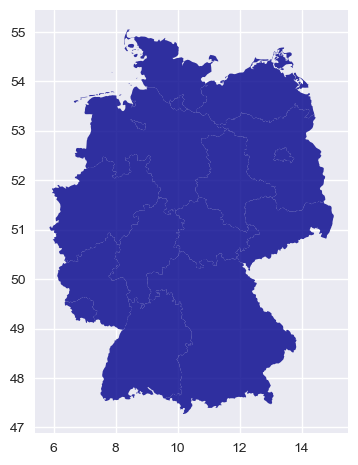

In [87]:
fig, ax = plt.subplots()

ger_plot = df_ger.plot(ax=ax, color='darkblue', alpha=0.8)

In [82]:
print(df_ger.iloc[:,3])
print(df_ger[['GEN','geometry']])

0                    Hamburg
1              Niedersachsen
2                     Bremen
3        Nordrhein-Westfalen
4                     Hessen
5            Rheinland-Pfalz
6          Baden-Württemberg
7                     Bayern
8                   Saarland
9                     Berlin
10               Brandenburg
11    Mecklenburg-Vorpommern
12                   Sachsen
13            Sachsen-Anhalt
14                 Thüringen
15        Schleswig-Holstein
Name: GEN, dtype: object
                       GEN                                           geometry
0                  Hamburg  MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...
1            Niedersachsen  MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...
2                   Bremen  MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...
3      Nordrhein-Westfalen  POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...
4                   Hessen  POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...
5          Rheinland-Pfalz  POLYGON ((7.846

In [91]:
df_ger['color'] = ['blue', 'orange', 'yellow', 'red', 'purple', 'green', 'pink', 'black', 'white', 'grey', 'violet', 'maroon', 'olive', 'cyan', 'magenta', 'teal']

<Axes: >

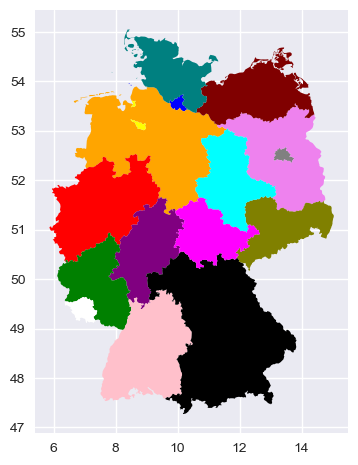

In [92]:
df_ger.plot(color=df_ger['color'])     